In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



%matplotlib notebook

In [18]:
G = nx.karate_club_graph()

<IPython.core.display.Javascript object>


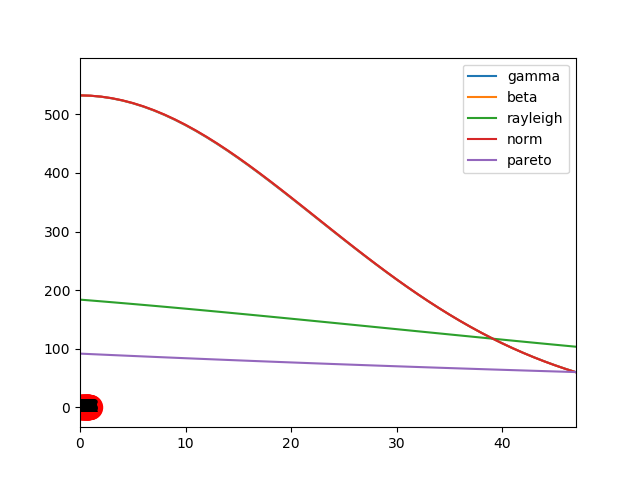

In [19]:
plt.figure()
nx.draw_networkx(G)

In [4]:
N= G.number_of_nodes()    
E= G.number_of_edges()

In [5]:
feature_dict = FeatureGenerator.FeatureGenerator(G)


{'degree_mean': 34.5,
 'degree_mean_E-normalised': 0.02904040404040404,
 'degree_mean_N-normalised': 0.49285714285714288,
 'degree_median': 34.5,
 'degree_std': 20.20519735117675,
 'graph_clustering_E-normalised': 0.0004127954119806821,
 'graph_clustering_N-normalised': 0.007005727849043576,
 'graph_clustering_mean': 0.4904009494330503,
 'graph_clustering_median': None,
 'graph_clustering_std': None,
 'graph_transivity': 0.4905845874612418,
 'graph_transivity_E-normalised': 0.0004129499894454897,
 'graph_transivity_N-normalised': 0.007008351249446311,
 'number_of_edges': 1188,
 'number_of_nodes': 70,
 'number_of_triangles_mean': 278.01428571428573,
 'number_of_triangles_mean_E-normalised': 0.23401875901875904,
 'number_of_triangles_mean_N-normalised': 3.9716326530612247,
 'square_clustering_mean': 0.055006419069940547,
 'square_clustering_mean_E-normalised': 4.6301699553822011e-05,
 'square_clustering_mean_N-normalised': 0.00078580598671343642,
 'square_clustering_median': 0.0549492393

In [8]:
from hcga.Operations import heuristics


In [1]:
meh =heuristics.heuristics(G)

NameError: name 'heuristics' is not defined

In [20]:
from networkx.algorithms import approximation as apxa

k_components = apxa.k_components(G)


In [22]:
from networkx.algorithms import centrality


In [37]:
#list(centrality.degree_centrality(G).values())
degree_centrality = np.asarray(list(centrality.degree_centrality(G).values()))

In [38]:
degree_centrality.std()

0.11576850539129781

In [40]:
import scipy.stats as st
import statsmodels as sm

In [96]:
import warnings

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    
    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit      
            #print(distribution)
            #params = distribution.fit(data)

            with warnings.catch_warnings():

                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass
                
                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)


In [98]:
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

meh, mh2 = best_fit_distribution(data, bins=200, ax=None)


In [101]:
bin_sizes = [5,25,200]
opt_mod = []
for bins in bin_sizes:
    opt_mod.append(best_fit_distribution(degree_centrality,bins=bins))
        

In [106]:
opt_mod[2][0]

'ncf'

In [113]:
def power_law_fit(data):
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    try:
        # Ignore warnings from data that can't be fit
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore')
            params = st.powerlaw.fit(data)

            # Separate parts of parameters
            arg = params[:-2]
            loc = params[-2]
            scale = params[-1]

            # Calculate fitted PDF and error with fit in distribution
            pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
            sse = np.sum(np.power(y - pdf, 2.0))
    except Exception:
        pass
    
    return (params, sse)

In [114]:


params,sse = power_law_fit(data)


In [117]:
params


(1.0662989528768636, 18.949114117119365, 10.290886477279205)